## <center><font color='Red'>Data Analysis On Uber Rides</font></center>

## Importing required libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [31]:
uber_df = pd.read_csv(r"C:\Users\91998\OneDrive\Assignments\uber_rider\uber_rides_data.xlsx - sample_train.csv")
uber_df.shape

(200000, 8)

In [32]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


## Observation: 1. "Dropoof_longitude" and "Dropoff_latitude" has 1 missing value
##              2. "Pickup_datetime" have incorrect data type.

### Changing the data type of "pickup_datetime" to datetime from object.

In [33]:
uber_df['pickup_datetime'] = pd.to_datetime(uber_df['pickup_datetime'])

In [34]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ride_id            200000 non-null  int64              
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 12.2 MB


In [35]:
uber_df['pickup_datetime'] = uber_df['pickup_datetime'].astype('datetime64[ns]')

C:\Users\91998\AppData\Local\Temp\ipykernel_6652\8745950.py:1: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  uber_df['pickup_datetime'] = uber_df['pickup_datetime'].astype('datetime64[ns]')


In [36]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ride_id            200000 non-null  int64         
 1   fare_amount        200000 non-null  float64       
 2   pickup_datetime    200000 non-null  datetime64[ns]
 3   pickup_longitude   200000 non-null  float64       
 4   pickup_latitude    200000 non-null  float64       
 5   dropoff_longitude  199999 non-null  float64       
 6   dropoff_latitude   199999 non-null  float64       
 7   passenger_count    200000 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 12.2 MB


## Droping Null values

In [37]:
uber_df = uber_df.dropna()

In [38]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ride_id            199999 non-null  int64         
 1   fare_amount        199999 non-null  float64       
 2   pickup_datetime    199999 non-null  datetime64[ns]
 3   pickup_longitude   199999 non-null  float64       
 4   pickup_latitude    199999 non-null  float64       
 5   dropoff_longitude  199999 non-null  float64       
 6   dropoff_latitude   199999 non-null  float64       
 7   passenger_count    199999 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 13.7 MB


In [39]:
uber_df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5


## What is the average fare amount?


In [40]:
uber_df["fare_amount"].mean()

11.359891549458371

## Calculate distance between each pickup and dropoff points using Haversine formula. 
## What is the median haversine distance between pickup and dropoff location according to the given dataset?

In [42]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    ## print(lat1,lat2,lon1,lon2)
    # Haversine formula
    d_lon = lon2 - lon1
    d_lat = lat2 - lat1
    a = np.sin(d_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(d_lon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of Earth in kilometers (mean value)
    r = 6371
    
    # Calculate the Haversine distance
    distance = c * r
    return distance

uber_df['haversine_distance'] = uber_df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Calculate the median Haversine distance
median_distance = uber_df['haversine_distance'].median()

print("Median Haversine Distance:", median_distance)


Median Haversine Distance: 2.1209923961833708


## What is the maximum haversine distance between pickup and dropoff location according to the given dataset?

In [43]:

max_distance = uber_df['haversine_distance'].max()

print("Maximum Haversine Distance:", max_distance)


Maximum Haversine Distance: 16409.239135313164


## How many rides have 0.0 haversine distance between pickup and dropoff location according to the given dataset?

In [44]:

zero_distance_rides = uber_df[uber_df['haversine_distance'] == 0.0]
count_zero_distance_rides = len(zero_distance_rides)

print("Number of rides with 0.0 Haversine Distance:", count_zero_distance_rides)


Number of rides with 0.0 Haversine Distance: 5632


## What is the mean 'fare_amount' for rides with 0 haversine distance?


In [45]:
mean_fare_amount_zero_distance = zero_distance_rides['fare_amount'].mean()
print("Mean 'fare_amount' for rides with 0 Haversine Distance:", mean_fare_amount_zero_distance)

Mean 'fare_amount' for rides with 0 Haversine Distance: 11.585317826704578


## Observation: fare amounts for short trips, such as within a small area, should be relatively low. If the mean fare amount for zero-distance rides is unusually high, it might suggest inconsistencies in the data. A mean 'fare_amount' of approximately 11.59 for rides with a 0 Haversine distance suggests that the fare amounts for these rides are relatively high considering they have no recorded distance traveled. In a typical scenario, a 0-distance ride should have a minimal fare, possibly representing a base fee or a fixed charge.

## What is the maximum 'fare_amount' for a ride?

In [46]:
max_fare_amount = uber_df['fare_amount'].max()
print("Maximum 'fare_amount' for a ride:", max_fare_amount)

Maximum 'fare_amount' for a ride: 499.0


In [47]:
## What is the haversine distance between pickup and dropoff location for the costliest ride?

In [48]:
# Finding the row with the highest 'fare_amount'
costliest_ride =uber_df[uber_df['fare_amount'] == uber_df['fare_amount'].max()]

# Calculating the Haversine distance for the costliest ride using the function created earlier
haversine_distance_costliest_ride = haversine_distance(
    costliest_ride['pickup_latitude'].values[0],
    costliest_ride['pickup_longitude'].values[0],
    costliest_ride['dropoff_latitude'].values[0],
    costliest_ride['dropoff_longitude'].values[0]
)

print("Haversine Distance for the Costliest Ride:", haversine_distance_costliest_ride)


Haversine Distance for the Costliest Ride: 0.0007899213191009994


## Observation:  a Haversine distance of 0.00079 for the costliest ride is highly unusual. It could be indicative of data errors, anomalies, or inaccuracies in the dataset. Analyzing additional information related to the ride and consulting with domain experts may be necessary to uncover the underlying issue.

## How many rides were recorded in the year 2014?


In [49]:
# Extracting the year from 'pickup_datetime'
uber_df['pickup_year'] = uber_df['pickup_datetime'].dt.year

# Count the number of rides in the year 2014
rides_2014 = uber_df[uber_df['pickup_year'] == 2014]
count_rides_2014 = len(rides_2014)

print("Number of rides recorded in the year 2014:", count_rides_2014)


Number of rides recorded in the year 2014: 29968


## How many rides were recorded in the first quarter of 2014?


In [50]:
uber_df['pickup_quarter'] = uber_df['pickup_datetime'].dt.quarter

# Counting the number of rides in the first quarter of 2014 (above question)
rides_q1_2014 = uber_df[(uber_df['pickup_year'] == 2014) & (uber_df['pickup_quarter'] == 1)]
count_rides_q1_2014 = len(rides_q1_2014)

print("Number of rides recorded in the first quarter of 2014:", count_rides_q1_2014)


Number of rides recorded in the first quarter of 2014: 7687


## On which day of the week in September 2010, maximum rides were recorded ?

In [21]:
# Extracting the day of the week from 'pickup_datetime'
uber_df['pickup_day_of_week'] = uber_df['pickup_datetime'].dt.day_name()

# Filter for rides in September 2010
rides_september_2010 = uber_df[(uber_df['pickup_datetime'].dt.year == 2010) & (uber_df['pickup_datetime'].dt.month == 9)]

# Count the rides for each day of the week in September 2010
max_rides_day_of_week = rides_september_2010['pickup_day_of_week'].value_counts().idxmax()

print("Day of the week with the maximum rides in September 2010:", max_rides_day_of_week)


Day of the week with the maximum rides in September 2010: Thursday


## EDA

In [52]:
uber_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             199999 non-null  int64         
 1   fare_amount         199999 non-null  float64       
 2   pickup_datetime     199999 non-null  datetime64[ns]
 3   pickup_longitude    199999 non-null  float64       
 4   pickup_latitude     199999 non-null  float64       
 5   dropoff_longitude   199999 non-null  float64       
 6   dropoff_latitude    199999 non-null  float64       
 7   passenger_count     199999 non-null  int64         
 8   haversine_distance  199999 non-null  float64       
 9   pickup_year         199999 non-null  int64         
 10  pickup_quarter      199999 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(4)
memory usage: 18.3 MB


In [53]:
uber_df = uber_df[["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]]

In [54]:
## Non Vizual Analysis on age feature
print(uber_df["fare_amount"].min())
print(uber_df["fare_amount"].max())
print(uber_df["fare_amount"].mean())
print(uber_df["fare_amount"].median())
print(uber_df["fare_amount"].std())

-52.0
499.0
11.359891549458371
8.5
9.90175999942789


In [55]:
numerical_features = [feature for feature in uber_df.columns if uber_df[feature].dtype != 'datetime64[ns]']

C:\Users\91998\AppData\Local\Temp\ipykernel_6652\624290284.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Ensure the subplots are well-arranged
C:\Users\91998\AppData\Local\Temp\ipykernel_6652\624290284.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Ensure the subplots are well-arranged
C:\Users\91998\AppData\Local\Temp\ipykernel_6652\624290284.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Ensure the subplots are well-arranged
C:\Users\91998\AppData\Local\Temp\ipykernel_6652\624290284.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Ensure the subplots are well-arranged
C:\Users\91998\AppData\Local\Temp\ipykernel_6652\624290284.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Ensure the subplots are well-arranged


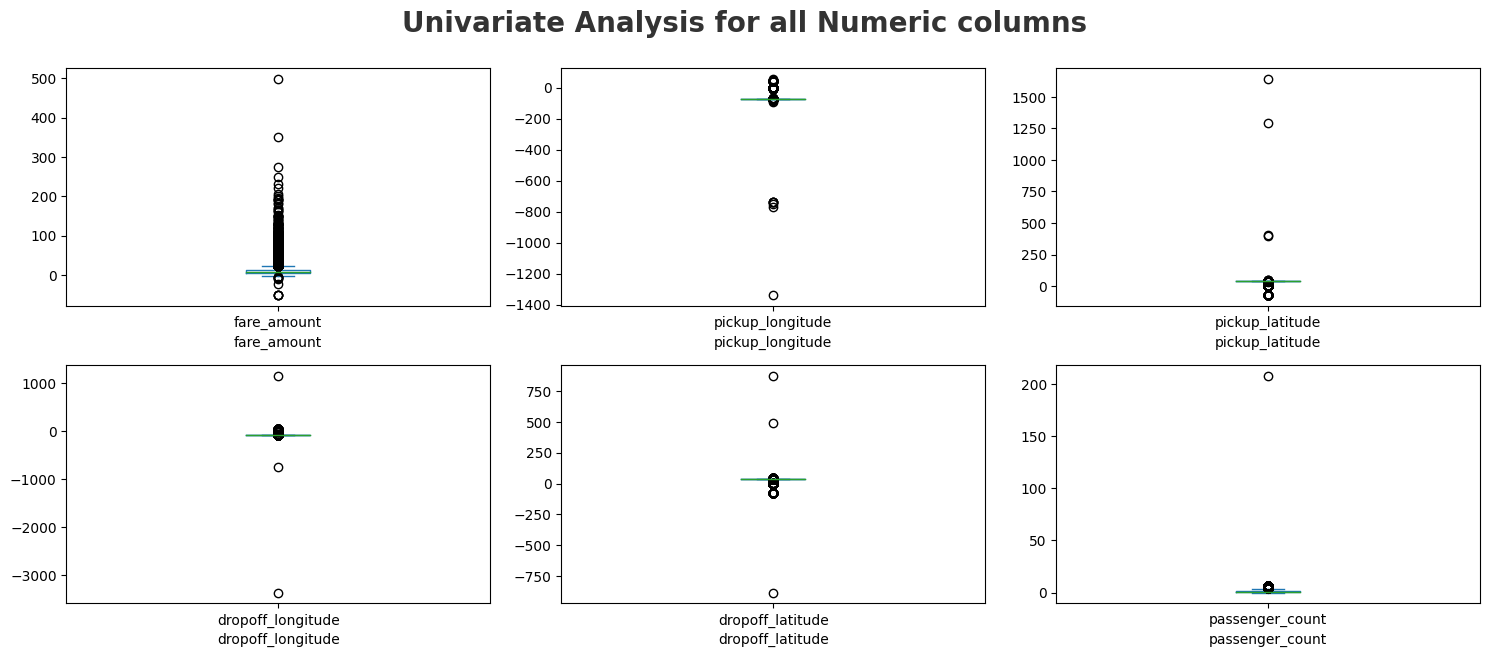

In [56]:
import matplotlib.pyplot as plt

# Set the figure size and overall title
plt.figure(figsize=(15, 15))
plt.suptitle("Univariate Analysis for all Numeric columns", fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop through each numeric feature and create a box plot
for i in range(len(numerical_features)):
    plt.subplot(5, 3, i + 1)  # Create subplots in a 5x3 grid
    uber_df[numerical_features[i]].plot(kind="box")  # Create a box plot for the current feature
    plt.xlabel(numerical_features[i])  # Set the x-axis label
    plt.tight_layout()  # Ensure the subplots are well-arranged

# Show the plots
plt.show()


C:\Users\91998\AppData\Local\Temp\ipykernel_6652\2061743673.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\91998\AppData\Local\Temp\ipykernel_6652\2061743673.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\91998\AppData\Local\Temp\ipykernel_6652\2061743673.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\91998\AppData\Local\Temp\ipykernel_6652\2061743673.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\91998\AppData\Local\Temp\ipykernel_6652\2061743673.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


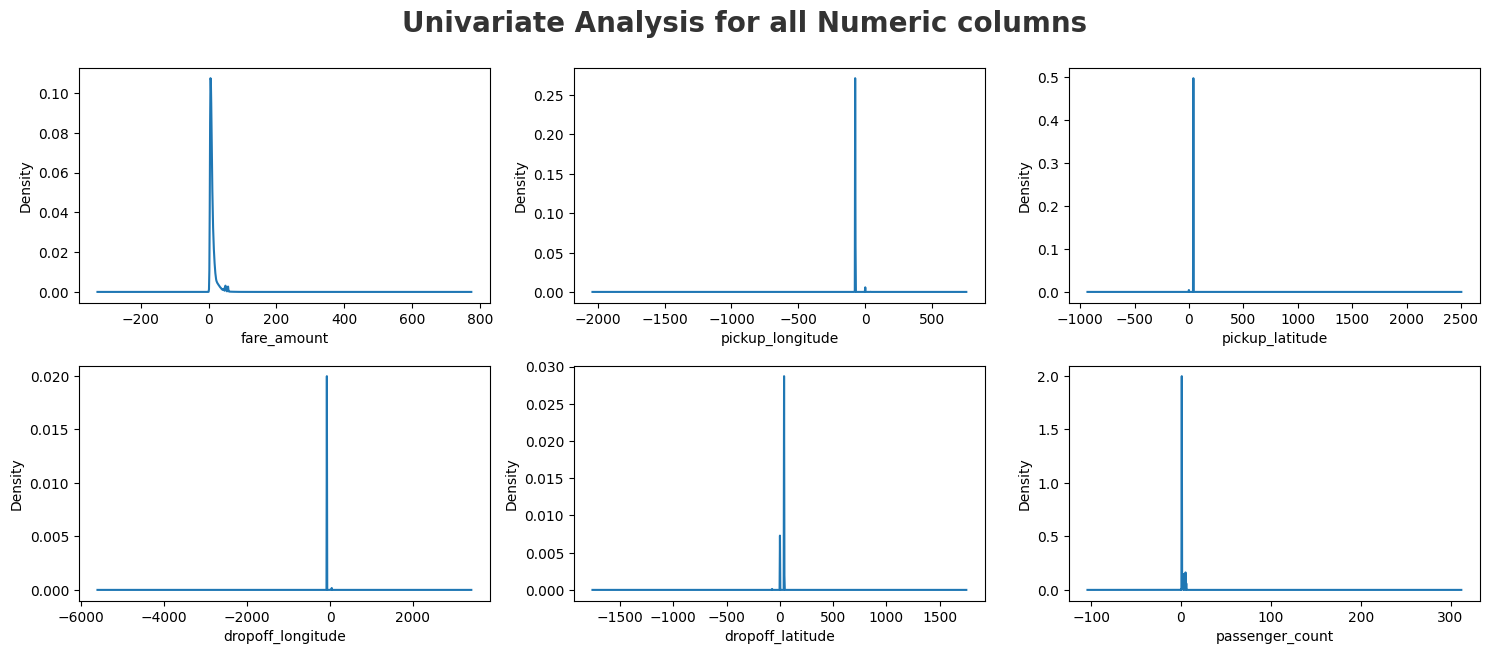

In [59]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis for all Numeric columns",fontsize = 20,fontweight ='bold',alpha=0.8,y=1.)
for i in range(len(numerical_features)):
    plt.subplot(5,3,i+1)
    uber_df[numerical_features[i]].plot(kind="kde")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

C:\Users\91998\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='pickup_longitude', ylabel='fare_amount'>

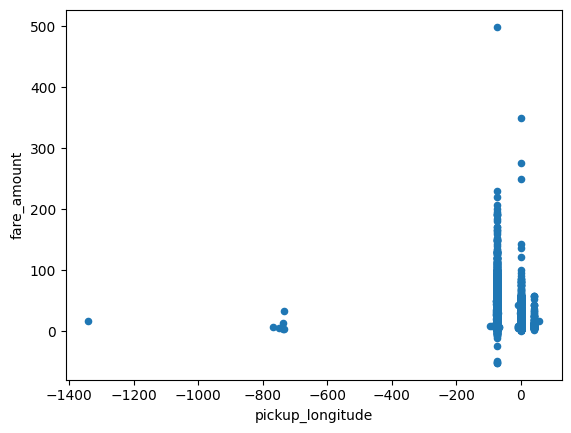

In [60]:
## Vizual Analysis on age And Charges
uber_df.plot(kind="scatter",x="pickup_longitude",y="fare_amount")

C:\Users\91998\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='pickup_latitude', ylabel='fare_amount'>

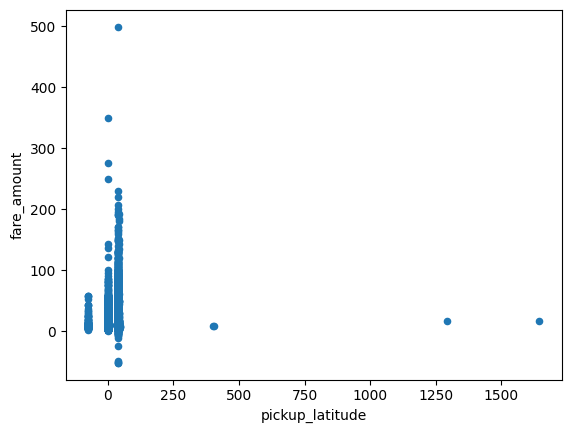

In [61]:
## Vizual Analysis on age And Charges
uber_df.plot(kind="scatter",x="pickup_latitude",y="fare_amount")

C:\Users\91998\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='passenger_count', ylabel='fare_amount'>

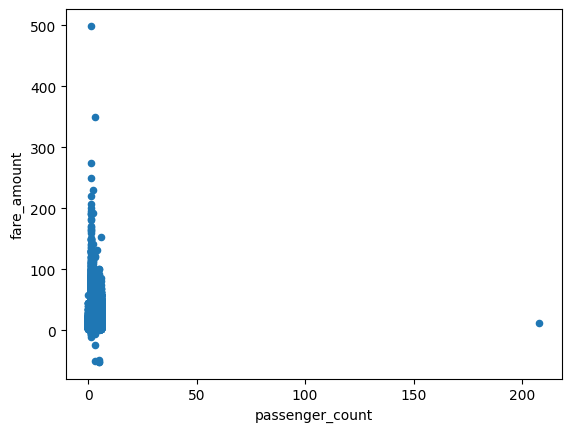

In [62]:
## Vizual Analysis on age And Charges
uber_df.plot(kind="scatter",x="passenger_count",y="fare_amount")

C:\Users\91998\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='dropoff_longitude', ylabel='fare_amount'>

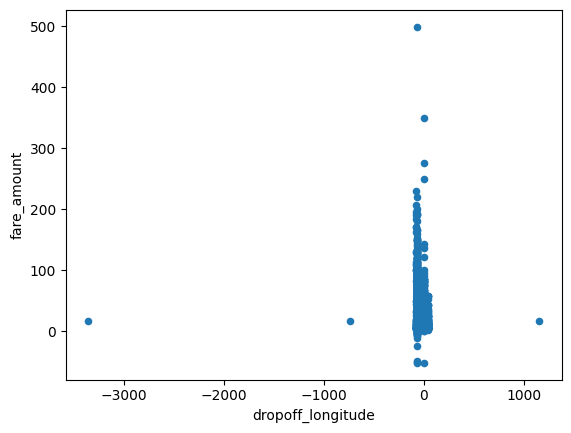

In [63]:
## Vizual Analysis on age And Charges
uber_df.plot(kind="scatter",x="dropoff_longitude",y="fare_amount")

C:\Users\91998\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='dropoff_latitude', ylabel='fare_amount'>

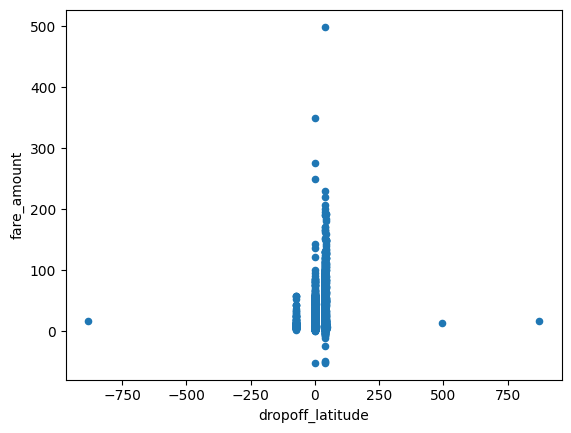

In [64]:
## Vizual Analysis on age And Charges
uber_df.plot(kind="scatter",x="dropoff_latitude",y="fare_amount")

## Observation : By analysing this graph we can say that this data set consists of much noise, anomalies, or inaccuracies in the data. 

## Machine Learning Frame Woek:

In [35]:
### step1: Identifying input and output values 
y = uber_df["fare_amount"]
X = uber_df[["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]]

In [36]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=20)

In [37]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(139999, 5) (139999,)
(60000, 5) (60000,)


In [38]:
X_train.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Here all input variables are numerical so we have to use standardization technique.

In [41]:
## Data Preparation on X_Train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
print(X_train_transformed.shape)

(139999, 5)


In [42]:
## Data Preparation on X_test
X_test_transformed = scaler.transform(X_test)
print(X_test_transformed.shape)

(60000, 5)


## Linear Regression

In [43]:
### build the model on Trained transformed data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

LinearRegression()

In [44]:
## Checking for  the train_score
y_train_pred = regressor.predict(X_train_transformed)

In [45]:
train_df = pd.DataFrame({"Actual":y_train,"Predicted":y_train_pred})
train_df.head()

,Actual,Predicted
186261,6.1,11.286981
10541,3.0,11.284823
23084,3.3,12.171134
171594,7.3,11.286548
72089,8.5,11.285245


In [46]:
from sklearn import metrics
# Adjusted R^2

r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.00023060278679665203


## KNN Regressor

In [47]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [48]:
## Checking for  the train_score
y_train_pred = regressor.predict(X_train_transformed)

In [49]:
train_df = pd.DataFrame({"Actual":y_train,"Predicted":y_train_pred})
train_df.head()

,Actual,Predicted
186261,6.1,6.76
10541,3.0,4.06
23084,3.3,15.64
171594,7.3,7.54
72089,8.5,5.88


In [50]:
from sklearn import metrics
# Adjusted R^2

r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.8065948504482047


In [51]:
### Prediction
y_test_pred = regressor.predict(X_test_transformed)

In [52]:
test_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
test_df.head()

,Actual,Predicted
103231,8.9,7.940
41917,4.5,5.460
182140,32.0,29.906
74081,5.3,7.440
62848,8.1,5.740


In [53]:
from sklearn import metrics
# Adjusted R^2

r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.7434019205390114


## Decision Tree Regressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [55]:
## Checking for  the train_score
y_train_pred = regressor.predict(X_train_transformed)

In [56]:
train_df = pd.DataFrame({"Actual":y_train,"Predicted":y_train_pred})
train_df.head()

,Actual,Predicted
186261,6.1,6.100000
10541,3.0,3.000000
23084,3.3,11.868542
171594,7.3,7.300000
72089,8.5,8.500000


In [57]:
from sklearn import metrics
# Adjusted R^2

r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9626971339346695


In [58]:
### Prediction
y_test_pred = regressor.predict(X_test_transformed)

In [59]:
test_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
test_df.head()

,Actual,Predicted
103231,8.9,5.7
41917,4.5,5.7
182140,32.0,23.7
74081,5.3,6.1
62848,8.1,6.5


In [60]:
from sklearn import metrics
# Adjusted R^2

r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.579201221508084


## Observation : This is Overfitted model on the data , because train score is higher than test score

## Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [63]:
## Checking for  the train_score
y_train_pred = regressor.predict(X_train_transformed)

In [64]:
train_df = pd.DataFrame({"Actual":y_train,"Predicted":y_train_pred})
train_df.head()

,Actual,Predicted
186261,6.1,6.749000
10541,3.0,3.699000
23084,3.3,11.841599
171594,7.3,8.039000
72089,8.5,7.573000


In [65]:
from sklearn import metrics
# Adjusted R^2

r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.9323484210131511


In [66]:
### Prediction
y_test_pred = regressor.predict(X_test_transformed)

In [67]:
test_df = pd.DataFrame({"Actual":y_test,"Predicted":y_test_pred})
test_df.head()

,Actual,Predicted
103231,8.9,7.2730
41917,4.5,5.1820
182140,32.0,31.4755
74081,5.3,7.5730
62848,8.1,5.8200


In [68]:
from sklearn import metrics
# Adjusted R^2

r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.7678564528613151


## Observation: This model is also Overfitted model on the data because Learning is good but test results are not very high. but comparitive decision tree random forest is the best model.

## Observation: comparative four models best fitted model is KNN model.